In [2]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import cartopy.crs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import os
import warnings

In [104]:
# Find Directory and Folders
Diri = "/glade/scratch/zarzycki/DCMIP_2016/"
Folders = ["fv3", "mpas", "icon", "gem", "nicam", "acme"]
Models = ["FV3", "MPAS", "ICON", "GEM", "NICAM", "ACME"]
#
# List Files
for i in range(len(Folders)):
    Files = os.listdir(Diri + Folders[i])
    print (Files)

['fv3.161-dry.r100.L30.interp_latlon.nonhydro_instant.nc', 'fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_average.nc', 'fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_instant.nc']
['mpas.161.r100.L30.latlon.nonhydro.kessler.dcmip_physics.Bill.nc', 'mpas.161.r100.L30.latlon.nonhydro.dry.Bill.nc', 'mpas.161.r100.L30.latlon.nonhydro.kessler.Bill.nc']
['icon.161-dry.r100.L30.interp_latlon.nonhydro.dt300_dtchem900_dtcpl900_nophy.RHO.nc', 'icon.161.r100.L30.interp_latlon.nonhydro.Q2.nc', 'icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.Z.nc', 'icon.161.r100.L30.interp_latlon.nonhydro.RAIN_GSP.nc', 'icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.aw.nc', 'icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.RAIN_GSP.nc', 'icon.161-dry.r100.L30.interp_latlon.nonhydro.dt300_dtchem900_dtcpl900_nophy.W.nc', 'icon.161.r100.L30.interp_latlon.nonhydro.P.nc', 'icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900

In [101]:
# Question 1 Dry
# Create Empty Arrays
Min_Pressure_Dry = numpy.zeros((6,31))
Max_Pressure_Dry = numpy.zeros((6,31))
#
# Find File Name
for i in range(len(Models)):
    Folder = Diri + Folders[i]
    if i == 0:
        Filename = '/fv3.161-dry.r100.L30.interp_latlon.nonhydro_instant.nc'
    if i == 1:
        Filename = '/mpas.161.r100.L30.latlon.nonhydro.dry.Bill.nc'
    if i == 2:
        Filename = '/icon.161-dry.r100.L30.interp_latlon.nonhydro.dt300_dtchem900_dtcpl900_nophy.PS.nc'
    if i == 3:
        Filename = '/gem.161-dry.r100.L30.interp_latlon.nonhydro.del6.ps.nc'
    if i == 4:
        Filename = '/nicam.161-dry.r100.L30.interp_latlon.nonhydro.PS.nc'
    if i == 5:
        Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.dry.PS.nc'
#
# Open Datasets
    Dry_Data = xr.open_dataset(Folder + Filename, decode_times=False)
    Dry_Data
#
# Open Pressure Variable
    if i != 5:
        Dry_Pressure = Dry_Data.PS
    else:
        Dry_Pressure = Dry_Data.ps
#
# Find Min Pressure
    for k in range(len(Pressure_Data["time"])):
        Min_Pressure_Dry[i][k] = numpy.min(Dry_Pressure[k, :, :]) / 100.
            
#
# Find Max Pressure
    for k in range(len(Pressure_Data["time"])):
        Max_Pressure_Dry[i][k] = numpy.max(Dry_Pressure[k, :, :]) / 100.
print (Min_Pressure_Dry)
#print (Max_Pressure_Dry)

[[1000.          999.71359375  999.58460938  999.33375     998.81015625
   997.8065625   995.75273438  991.27296875  980.8628125   958.29507813
   941.176875    929.36890625  922.293125    903.8884375   888.88125
   884.8303125   874.01421875  871.33171875  872.79375     869.70929687
   870.99882813  873.28039062  874.01773438  866.41898438  862.9884375
   863.8646875   860.52664063  857.74078125  856.26023437  857.6834375
   854.97804688]
 [1000.          998.603125    998.82078125  998.72484375  998.50359375
   997.62523437  996.05304687  992.27390625  983.434375    962.75765625
   939.35507812  927.60609375  918.6359375   905.26679687  890.5190625
   889.95375     884.85601563  880.72679687  874.44703125  870.4934375
   879.45929687  874.97273437  875.414375    878.84164062  867.58828125
   866.16226563  864.33234375  864.50320313  863.36367188  863.12046875
   865.37335937]
 [1000.02710938  999.75164063  999.67734375  999.50351562  999.09960938
   998.29632812  996.56257812  992.81

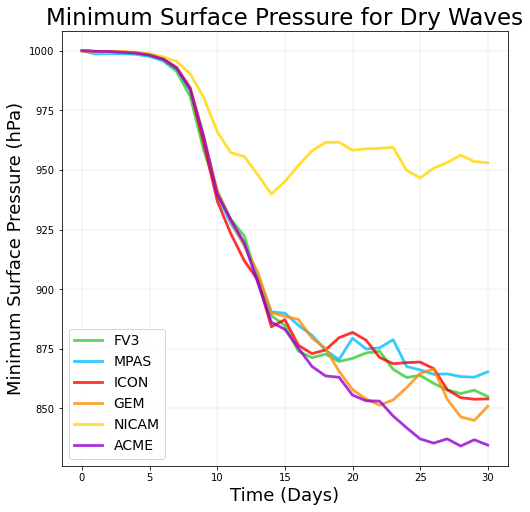

In [120]:
# Plot Min Pressure
Fig = pyplot.figure(figsize=(8,8))
Axes = Fig.add_subplot(1,1,1)
Colours = ['limegreen', 'deepskyblue', 'red', 'darkorange', 'gold', 'darkviolet']
for i in range(len(Models)):
    Axes.plot(Pressure_Data["time"], Min_Pressure_Dry[i], c=Colours[i], label=Models[i], linewidth=2.8, alpha=0.8)
pyplot.grid('grid', linestyle="-", linewidth=0.25, color='silver')
pyplot.xlabel('Time (Days)', fontsize=18)
pyplot.ylabel('Minimum Surface Pressure (hPa)', fontsize=18)
pyplot.title('Minimum Surface Pressure for Dry Waves', fontsize=23)
pyplot.legend(loc=3, fontsize=14)
Fig.savefig('Q1_Min_Dry.png', bbox_inches='tight')

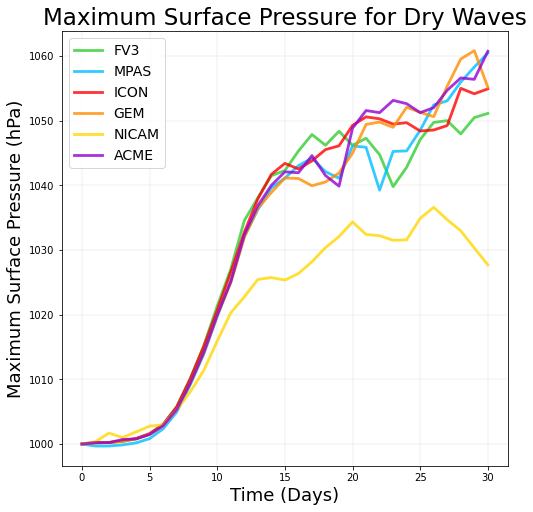

In [125]:
# Plot Max Pressure
Fig = pyplot.figure(figsize=(8,8))
Axes = Fig.add_subplot(1,1,1)
Colours = ['limegreen', 'deepskyblue', 'red', 'darkorange', 'gold', 'darkviolet']
for i in range(len(Models)):
    Axes.plot(Pressure_Data["time"], Max_Pressure_Dry[i], c=Colours[i], label=Models[i], linewidth=2.8, alpha=0.8)
pyplot.grid('grid', linestyle="-", linewidth=0.25, color='silver')
pyplot.xlabel('Time (Days)', fontsize=18)
pyplot.ylabel('Maximum Surface Pressure (hPa)', fontsize=18)
pyplot.title('Maximum Surface Pressure for Dry Waves', fontsize=23)
pyplot.legend(loc=2, fontsize=14)
Fig.savefig('Q1_Max_Dry.png', bbox_inches='tight')

In [116]:
# Question 2 Moist
# Create Empty Arrays
Min_Pressure_Moist = numpy.zeros((6,31))
Max_Pressure_Moist = numpy.zeros((6,31))
#
# Find File Name
for i in range(len(Models)):
    Folder = Diri + Folders[i]
    if i == 0:
        Filename = '/fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_instant.nc'
    if i == 1:
        Filename = '/mpas.161.r100.L30.latlon.nonhydro.kessler.Bill.nc'
    if i == 2:
        Filename = '/icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.PS.nc'
    if i == 3:
        Filename = '/gem.161-preciponly.r100.L30.interp_latlon.nonhydro.del6.ps.nc'
    if i == 4:
        Filename = '/nicam.161-preciponly.r100.L30.interp_latlon.nonhydro.PS.nc'
    if i == 5:
        Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.Kessler_only.PS.nc'
#
# Open Datasets
    Moist_Data = xr.open_dataset(Folder + Filename, decode_times=False)
    Moist_Data
#
# Open Pressure Variable
    if i != 5:
        Moist_Pressure = Moist_Data.PS
    else:
        Moist_Pressure = Moist_Data.ps
#
# Find Min Pressure
    for k in range(len(Pressure_Data["time"])):
        Min_Pressure_Moist[i][k] = numpy.min(Moist_Pressure[k, :, :]) / 100.
            
#
# Find Max Pressure
    for k in range(len(Pressure_Data["time"])):
        Max_Pressure_Moist[i][k] = numpy.max(Moist_Pressure[k, :, :]) / 100.
print (Min_Pressure_Moist)
#print (Max_Pressure_Moist)

[[1000.          999.71460938  999.58664062  999.33664062  998.81398438
   997.81132813  995.75804687  991.17804687  977.1040625   952.72476563
   939.62789062  928.848125    921.06195312  905.36679687  901.82757812
   896.3059375   893.39960937  877.001875    878.5659375   878.68914063
   886.50828125  874.94851563  869.98523438  867.605       869.98570312
   873.67664063  876.6034375   870.99164062  869.0478125   878.34234375
   878.73125   ]
 [1000.          998.59976563  998.8178125   998.71710937  998.50835938
   997.639375    996.09601562  992.21882812  981.11046875  951.310625
   932.65171875  919.81304688  911.12078125  892.92242188  884.1671875
   876.10492187  873.553125    882.72359375  866.73859375  860.75960937
   858.6928125   858.54171875  870.17601562  879.18335938  873.43375
   876.56671875  882.43375     872.92328125  865.47429688  862.88625
   861.0978125 ]
 [1000.02710938  999.891875    999.81875     999.64625     999.24273438
   998.4409375   996.70617187  992.8232

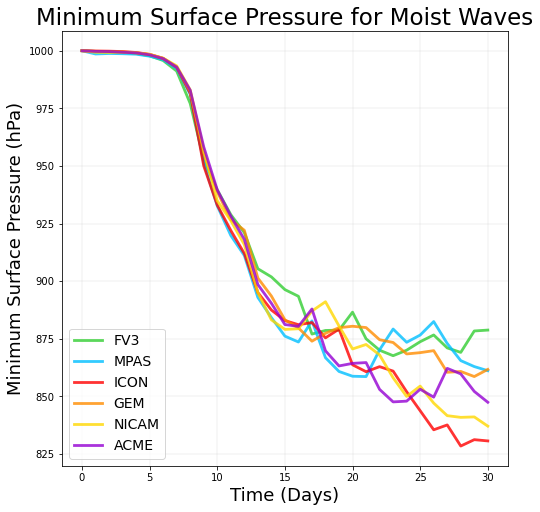

In [122]:
# Plot Min Pressure
Fig = pyplot.figure(figsize=(8,8))
Axes = Fig.add_subplot(1,1,1)
Colours = ['limegreen', 'deepskyblue', 'red', 'darkorange', 'gold', 'darkviolet']
for i in range(len(Models)):
    Axes.plot(Pressure_Data["time"], Min_Pressure_Moist[i], c=Colours[i], label=Models[i], linewidth=2.8, alpha=0.8)
pyplot.grid('grid', linestyle="-", linewidth=0.25, color='silver')
pyplot.xlabel('Time (Days)', fontsize=18)
pyplot.ylabel('Minimum Surface Pressure (hPa)', fontsize=18)
pyplot.title('Minimum Surface Pressure for Moist Waves', fontsize=23)
pyplot.legend(loc=3, fontsize=14)
Fig.savefig('Q1_Min_Moist.png', bbox_inches='tight')

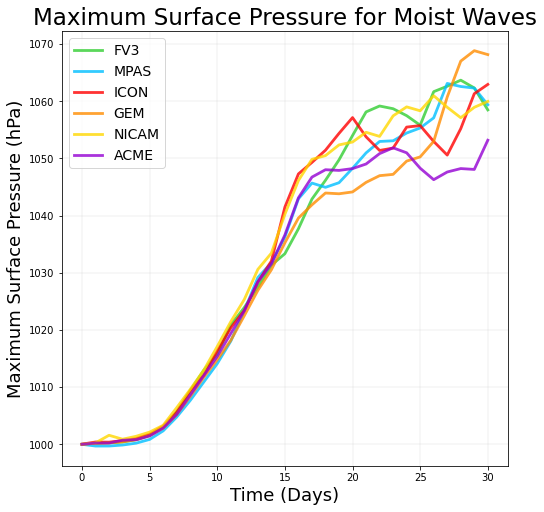

In [124]:
# Plot Min Pressure
Fig = pyplot.figure(figsize=(8,8))
Axes = Fig.add_subplot(1,1,1)
Colours = ['limegreen', 'deepskyblue', 'red', 'darkorange', 'gold', 'darkviolet']
for i in range(len(Models)):
    Axes.plot(Pressure_Data["time"], Max_Pressure_Moist[i], c=Colours[i], label=Models[i], linewidth=2.8, alpha=0.8)
pyplot.grid('grid', linestyle="-", linewidth=0.25, color='silver')
pyplot.xlabel('Time (Days)', fontsize=18)
pyplot.ylabel('Maximum Surface Pressure (hPa)', fontsize=18)
pyplot.title('Maximum Surface Pressure for Moist Waves', fontsize=23)
pyplot.legend(loc=2, fontsize=14)
Fig.savefig('Q1_Max_Moist.png', bbox_inches='tight')